In [126]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
import numpy as np

#PATH = 'C:\\Users\\Inmetrics\\Documents\\ProjetosInmetrics\\vivo\\UCM_Contribuicao\\78'
PATH = 'C:\\Users\\Inmetrics\\Documents\\Meus Arquivos Recebidos'
FILE_NAME_EXCEL = '\\tralala.xlsx'
COLUMNS = ['host', 'date', 'time', 'method' ,'uri', 'status','bytes', 'timetaken']

In [1]:
def convToInt(val):
    result = re.sub('\W', '' , val)
    return int(result)

def convToSegundo(val):
    result = re.sub('\s', '' , val)
    #result = re.sub('\W', '' , val)
    val = float(result)
    return val

def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = '{}-th percentile'.format(n)
    return _percentile

def formatdatahora(x, y):
    datahora = x + ' ' + y[:-3]
    return datetime.strptime(datahora, '%Y-%m-%d %H:%M')
    
def tratarURI(val):
    result = re.sub('\?.+$', '' , val)
    return result
    
    

In [130]:
dadosAccesslog = pd.read_csv(PATH + '\\access_mng3node.log',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   #usecols=[0, 3, 5, 6, 8, 9, 10],
                   names=COLUMNS,
                   converters={'status': convToInt,
                              'bytes': convToInt,
                              'timetaken': convToSegundo,
                              'uri': tratarURI}
                   )
dadosAccesslog['date_time'] = [formatdatahora(x, y) for x, y in dadosAccesslog[['date','time']].values]
dadosAccesslog = dadosAccesslog.set_index('date_time')
dadosAccesslog = dadosAccesslog.sort_values(by='date_time')
dadosAccesslog.head()

,host,date,time,method,uri,status,bytes,timetaken
date_time,,,,,,,,
2018-11-04 01:14:00,NaN,2018-11-04,01:14:59,GET,/portal/site/meuvivomobile/vivomobilehome,503,1843,0.50
2018-11-04 01:15:00,NaN,2018-11-04,01:15:12,GET,/PortalGVT/Atendimento/Area%20Aberta/Erro44,503,1843,0.23
2018-11-04 01:15:00,NaN,2018-11-04,01:15:55,GET,/PortalGVT/Atendimento/Area%20Aberta/Erro44,503,1843,0.00
2018-11-04 01:16:00,NaN,2018-11-04,01:16:10,GET,/PortalGVT/Atendimento/Area%20Aberta/Erro44,200,3828,10.17
2018-11-04 01:16:00,NaN,2018-11-04,01:16:14,GET,/PortalGVT/Atendimento/Area%20Aberta/Erro44,200,3828,0.07


## Análise de Response time

Veriqueif asdfasdasdf ~çaskdfçlsasdf~ç sfsdçlfçl ç 

asdsa veja o grafico:

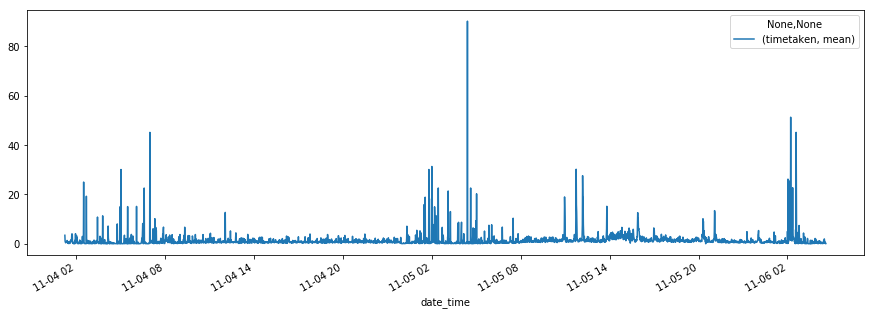

In [50]:
gp_Percentil_al = dadosAccesslog.loc[(dadosAccesslog['status'] == 200)]
gp_Percentil_al = gp_Percentil_al.groupby(['date_time']).agg({    
    'timetaken': ['mean']
})
gp_Percentil_al.plot(figsize=(15, 5))

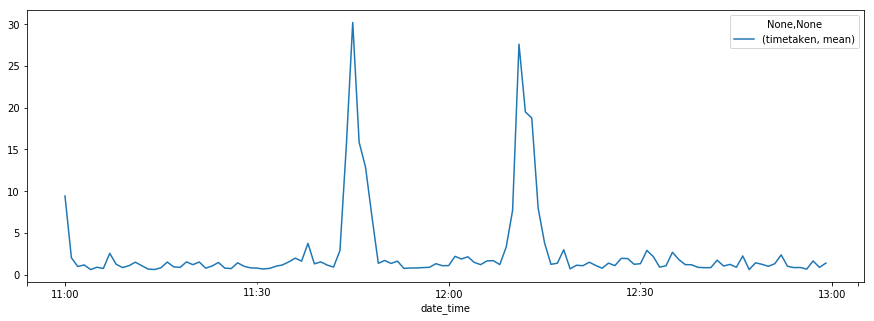

In [56]:
gp_Percentil_al = dadosAccesslog.loc[(dadosAccesslog['status'] == 200)]
gp_Percentil_al = gp_Percentil_al.groupby(['date_time']).agg({    
    'timetaken': ['mean']
})
gp_Percentil_al['2018-11-05 11':'2018-11-05 12'].plot(figsize=(15, 5))

In [136]:
teste = dadosAccesslog.loc[(dadosAccesslog['status'] == 200) & (dadosAccesslog.index > '2018-11-5 11') 
                           & (dadosAccesslog.index < '2018-11-5 13')]



teste = teste.groupby(['date_time','method','uri'],sort = True).agg({    
    'timetaken': ['mean']
})


teste = teste.sort_values(by=[('timetaken', 'mean')],ascending=False)
#teste.head(10).plot.barh(stacked=True, colormap='copper', figsize=(15, 30));




    

#dadosAccesslog['date_time'] = [formatdatahora(x, y) for x, y in dadosAccesslog[['date','time']].values]
teste.head()


,,,timetaken
,,,mean
date_time,method,uri,
2018-11-05 11:36:00,GET,/portal/site/meuvivo/parcelamento,261.090
2018-11-05 11:38:00,GET,/portal/site/meuvivomobile/template.BINARYPORTLET/segundaViaFaturaMobile/resource.process/,151.835
2018-11-05 12:11:00,POST,/portal/site/meuvivo/template.BINARYPORTLET/consultarProtocolo/resource.process/,133.411
2018-11-05 12:12:00,POST,/portal/site/meuvivo/template.BINARYPORTLET/segundaViaConta/resource.process/,129.073
2018-11-05 11:48:00,POST,/portal/site/meuvivo/template.BINARYPORTLET/consultarProtocolo/resource.process/,128.775


In [141]:
dfparcelamento = dadosAccesslog.loc[(dadosAccesslog['uri'] == '/portal/site/meuvivo/parcelamento')]

dfparcelamento['timetaken'].describe()




count    549.000000
mean       1.865168
std       12.335330
min        0.040000
25%        0.610000
50%        0.720000
75%        0.981000
max      261.090000
Name: timetaken, dtype: float64

In [142]:
dfparcelamento = dadosAccesslog.loc[(dadosAccesslog['uri'] == '/portal/site/meuvivo/meuvivohome')]

dfparcelamento['timetaken'].describe()


count    22201.000000
mean         3.589748
std         11.035023
min          0.010000
25%          0.030000
50%          1.510000
75%          2.830000
max        309.010000
Name: timetaken, dtype: float64

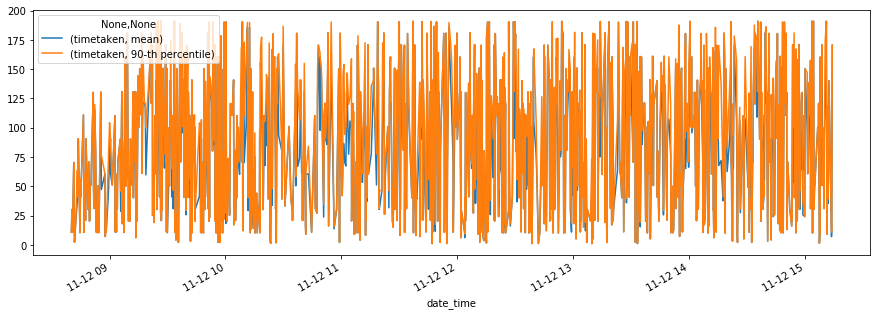

In [113]:
gp_Percentil_al = dadosAccesslog.loc[(dadosAccesslog['status'] == 200) & (dadosAccesslog['timetaken'] < 200)
                                    & (dadosAccesslog['timetaken'] > 1)]
gp_Percentil_al = gp_Percentil_al.groupby(['date_time']).agg({    
    'timetaken': ['mean', percentile(90)]
})
gp_Percentil_al.plot(figsize=(15, 5))

In [55]:
dfgrupo = dadosAccesslog.loc[(dadosAccesslog['status'] == 200) & (dadosAccesslog['status'] == 200)]

dfgrupo = dfgrupo.groupby([dfgrupo.index.hour, dfgrupo.index.minute, 'uri']).agg({    
    'timetaken': ['mean']
})
dfgrupo.sort_values(by=[('timetaken', 'mean')], ascending=True)
dfgrupo.head(10).plot.barh(stacked=True, colormap='copper', figsize=(15, 5));

dfgrupo = dfgrupo.loc[(dfgrupo[('timetaken', 'mean')] > 200) & (dfgrupo[('timetaken', 'mean')] < 300) ]
dfgrupo.head()

KeyError: 'date_time'

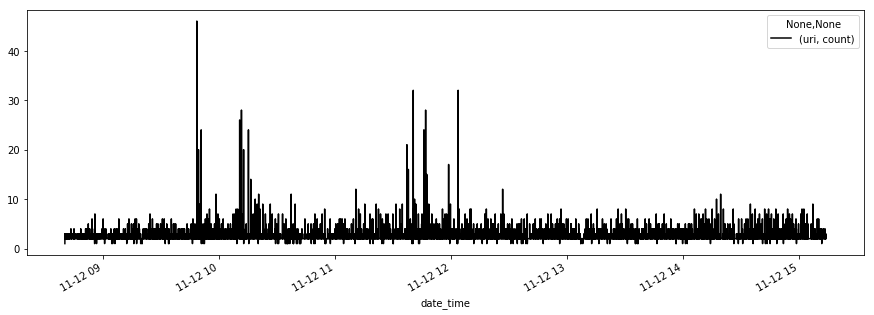

In [65]:
gp_host_al = dadosAccesslog.groupby('date_time').agg({    
    'uri': ['count']
})
gp_host_al.plot(stacked=True, colormap='copper', figsize=(15, 5));

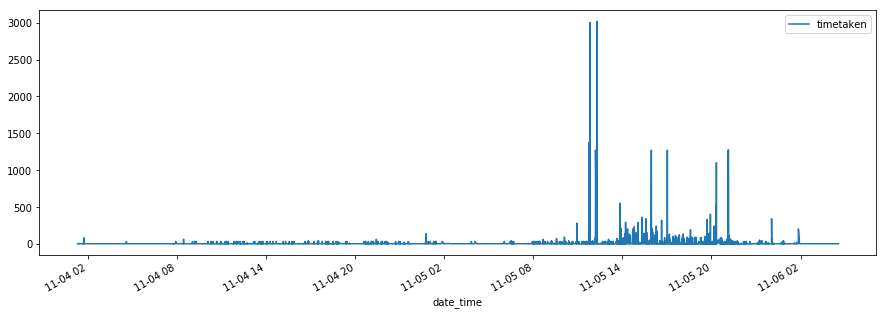

In [12]:
dfuri = dadosAccesslog.loc[(
                               (dadosAccesslog['uri'] == '/VIVOSegundaViaFaturaPortlet/segundaViaFatura.jsp*') 
                               |
                               (dadosAccesslog['uri'] == '/portal/site/meuvivomobile/vivomobilehome') 
                             )]



dfuri.head()
dfuri[['timetaken']].plot(figsize=(15, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002ACECA2BAC8>],
      dtype=object)

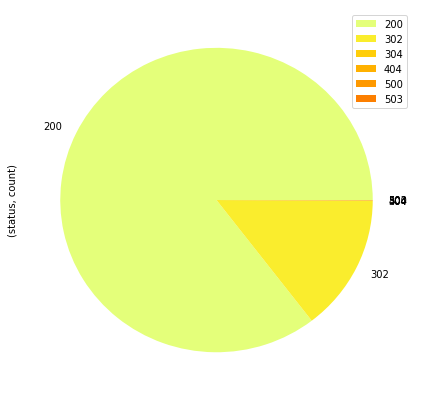

In [4]:
gp_erros_al = dadosAccesslog.groupby(['status']).agg({
    
    'status': ['count']
})
gp_erros_al.plot.pie(subplots=True, figsize=(7, 7), colormap='Wistia')

In [9]:
dadosAccesslog['date_time']['11-05'].head()

KeyError: 'date_time'

In [133]:
gp_200 = dadosAccesslog.loc[(dadosAccesslog['status'] == 200)]



gp_200['timetaken'].describe()

count    207235.000000
mean          1.413340
std           7.168405
min           0.000000
25%           0.020000
50%           0.090000
75%           0.640000
max         309.010000
Name: timetaken, dtype: float64